In [ ]:
# importing the required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
np.random.seed(42)

# The Dataset 

In [ ]:
# Obtaining the Olivetti Dataset
# 40 classes, labeled images
data = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


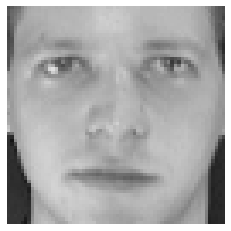

In [ ]:
# Example of how an image looks
image = data.images[0]
plt.axis('off')
#image = image.reshape(64, 64)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
plt.imshow(image)

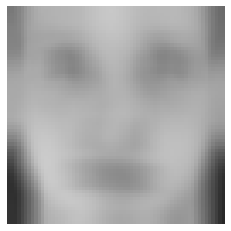

In [ ]:
newImg = cv2.GaussianBlur(image, (9, 9), 30)
plt.axis('off')
plt.imshow(newImg)

In [ ]:
# Generating a custom dataset, where each image is blurred, but the label remains the same

newImages = [None]*len(data.images)
newData = [None]*len(data.images)
labels = data.target
for i in range(len(data.images)):
  newImg = cv2.GaussianBlur(data.images[i], (9, 9), 30)
  newImages[i] = newImg
  newData[i] = newImg.reshape(data.data[0].shape)


# K Nearest Neighbours 

In [ ]:
# splitting the dataset into the training and testing set  
# Each class is being split in such a way that 90% is in the training set, and the remaining 10% in the test set.

x_train = []
y_train = []
x_test = []
y_test = []

for i in range(40):
  totalx = []
  totaly = []
  for j in range(len(labels)):
      if labels[j] == i:
          totalx.append(newData[j])
          totaly.append(labels[j])
  trainx, testx, trainy, testy = train_test_split(totalx, totaly, test_size = 0.1, random_state= 12)
  x_train += trainx
  y_train += trainy
  x_test += testx
  y_test += testy

(120, 4096)


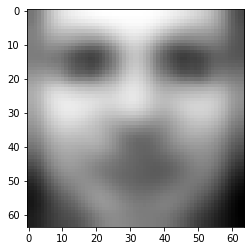

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

pca = PCA(n_components=120) 
pca.fit(x_train)
print(pca.components_.shape) # given the number of components and features
# The average face
plt.imshow(pca.mean_.reshape(data.images[0].shape), cmap = 'gray')  #displaying the data as an image of the same dimensions as the original data images

In [ ]:
# We now want each of the training faces to be converted to a linear combination of the eigenvectors
pcax_train = pca.transform(x_train)
print(pcax_train.shape)
# We now want to convert each of the testing images to a linear combiation of the eigenfaces
pcax_test = pca.transform(x_test)
print(pcax_test.shape)

(360, 120)
(40, 120)


In [ ]:
n = 1 # n is 1 so that we get the closest prediction only as the label for the input image
knn = neighbors.KNeighborsClassifier(n_neighbors=n)
knn.fit(pcax_train, y_train)
pred = knn.predict(pcax_test)

In [ ]:
# Comparing the predictions to the actual labels to compute the accuracy
print(pred)
print(y_test)
accuracy = accuracy_score(y_test,pred)
a = accuracy * 100
print("The accuracy of KNN is", a, "%")

[39  1 25 39  4  5  6  7  8  9 10 11  3 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
The accuracy of KNN is 90.0 %


In [ ]:
# Confusion matrix
conf = confusion_matrix(y_test, pred)
for i in range(len(conf)):
  print(*conf[i])

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

10


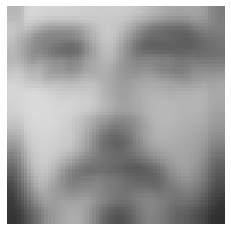

In [ ]:
# Demo of KNN prediction

index = 10 

trueLabel = y_test[index]
print(trueLabel)

# Example of how an image looks
image = x_test[index]
plt.axis('off')
image = image.reshape(64, 64)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
plt.imshow(image)

In [ ]:
prediction = knn.predict(pcax_test[index].reshape(1, -1))
print(prediction)

[10]


# VGG-19

Please run the data code before the KNN section again before executing the code below

In [ ]:
from keras.models import Sequential 
from keras.layers import *
from keras.applications.vgg19 import VGG19

In [ ]:
# pre-processing the dataset 
vggx = [None]*len(newImages)
vggy = [None]*len(newImages)

for i in range(len(newImages)):
  c = newImages[i]
  vggx[i] = cv2.cvtColor(c, cv2.COLOR_GRAY2BGR) # converting each image to a BGR one (3 channels now)
  
  # creating a one-hot encoding for the label for each image
  label = labels[i]
  l = [0]*40
  l[label] = 1
  vggy[i] = l

vggx = np.array(vggx)
vggy = np.array(vggy)
print(vggx.shape)  
print(vggy.shape) 

(400, 64, 64, 3)
(400, 40)


In [ ]:
# splitting the dataset into the training and testing set  
# Each class is being split in such a way that 90% is in the training set, and the remaining 10% in the test set.

x_train = []
y_train = []
x_test = []
y_test = []

for i in range(40):
  totalx = []
  totaly = []
  for j in range(len(vggy)):
      if labels[j] == i:
          totalx.append(vggx[j])
          totaly.append(vggy[j])
  trainx, testx, trainy, testy = train_test_split(totalx, totaly, test_size = 0.1)
  x_train += trainx
  y_train += trainy
  x_test += testx
  y_test += testy

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape, x_test.shape)

(360, 64, 64, 3) (40, 64, 64, 3)


In [ ]:
base = VGG19(include_top=False, weights='imagenet', input_shape=(64,64,3)) #referred to tf's VGG19 documentation and application example
for l in base.layers:
  l.trainable = False

model = Sequential([base, Dropout(0.5),Flatten(), Dense(40,activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy']) 

In [ ]:
# DOES NOT NEED TO BE EXECUTED AGAIN SINCE IT WILL SIMPLY TRAIN THE MODEL AGAIN
# predictions with a pre-saved, trained version of this model can be made further down in this notebook

MODEL = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test), shuffle = True)

Epoch 1/100
12/12 [==============================] - 1s 49ms/step - loss: 4.2090 - accuracy: 0.0250 - val_loss: 3.5727 - val_accuracy: 0.1000
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 3.7852 - accuracy: 0.0389 - val_loss: 3.3885 - val_accuracy: 0.3000
Epoch 3/100
12/12 [==============================] - 0s 24ms/step - loss: 3.5483 - accuracy: 0.0556 - val_loss: 3.2055 - val_accuracy: 0.3250
Epoch 4/100
12/12 [==============================] - 0s 24ms/step - loss: 3.3482 - accuracy: 0.1028 - val_loss: 3.0486 - val_accuracy: 0.5250
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 3.2095 - accuracy: 0.1722 - val_loss: 2.9109 - val_accuracy: 0.4750
Epoch 6/100
12/12 [==============================] - 0s 24ms/step - loss: 3.0271 - accuracy: 0.1694 - val_loss: 2.7869 - val_accuracy: 0.4750
Epoch 7/100
12/12 [==============================] - 0s 24ms/step - loss: 2.8919 - accuracy: 0.2389 - val_loss: 2.6617 - val_accuracy: 0.6250
Epoch 

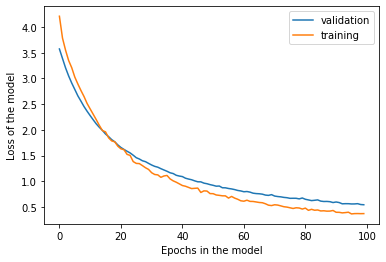

In [ ]:
# Loss vs # of Epochs plot

plt.plot(MODEL.history["val_loss"])
plt.plot(MODEL.history["loss"])
plt.xlabel("Epochs in the model")
plt.ylabel("Loss of the model")
plt.legend(['validation', 'training'])
plt.show()

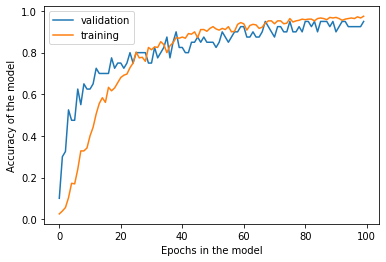

In [ ]:
# Accuracy vs # of Epochs plot

plt.plot(MODEL.history["val_accuracy"])
plt.plot(MODEL.history["accuracy"])
plt.xlabel("Epochs in the model")
plt.ylabel("Accuracy of the model")
plt.legend(['validation', 'training'])
plt.show()

In [ ]:
# Demo of VGG-19 based Model prediction

from keras.models import load_model
# a pre-trained version of my model is stored in this git directory
!git clone https://github.com/anushapant/AML_Model.git

Cloning into 'AML_Model'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.


In [ ]:
# loading the saved model 
model = load_model('AML_Model')

0


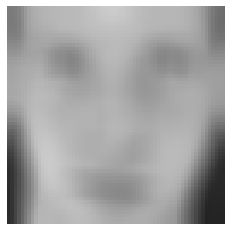

In [ ]:
index = 0

testimg = x_test[index]
plt.axis('off')
plt.imshow(testimg)

testimg = np.reshape(testimg,[1,64,64,3])
trueLabel = y_test[index]
print(np.argmax(trueLabel))

In [ ]:
prediction = model.predict(testimg)
print(np.argmax(prediction))

0
